<a href="https://colab.research.google.com/github/Nguyen-Tran-Thien-Tri/keras/blob/main/keras.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

   variance  skewness  curtosis  entropy  class
0   3.62160    8.6661   -2.8073 -0.44699      0
1   4.54590    8.1674   -2.4586 -1.46210      0
2   3.86600   -2.6383    1.9242  0.10645      0
3   3.45660    9.5228   -4.0112 -3.59440      0
4   0.32924   -4.4552    4.5718 -0.98880      0


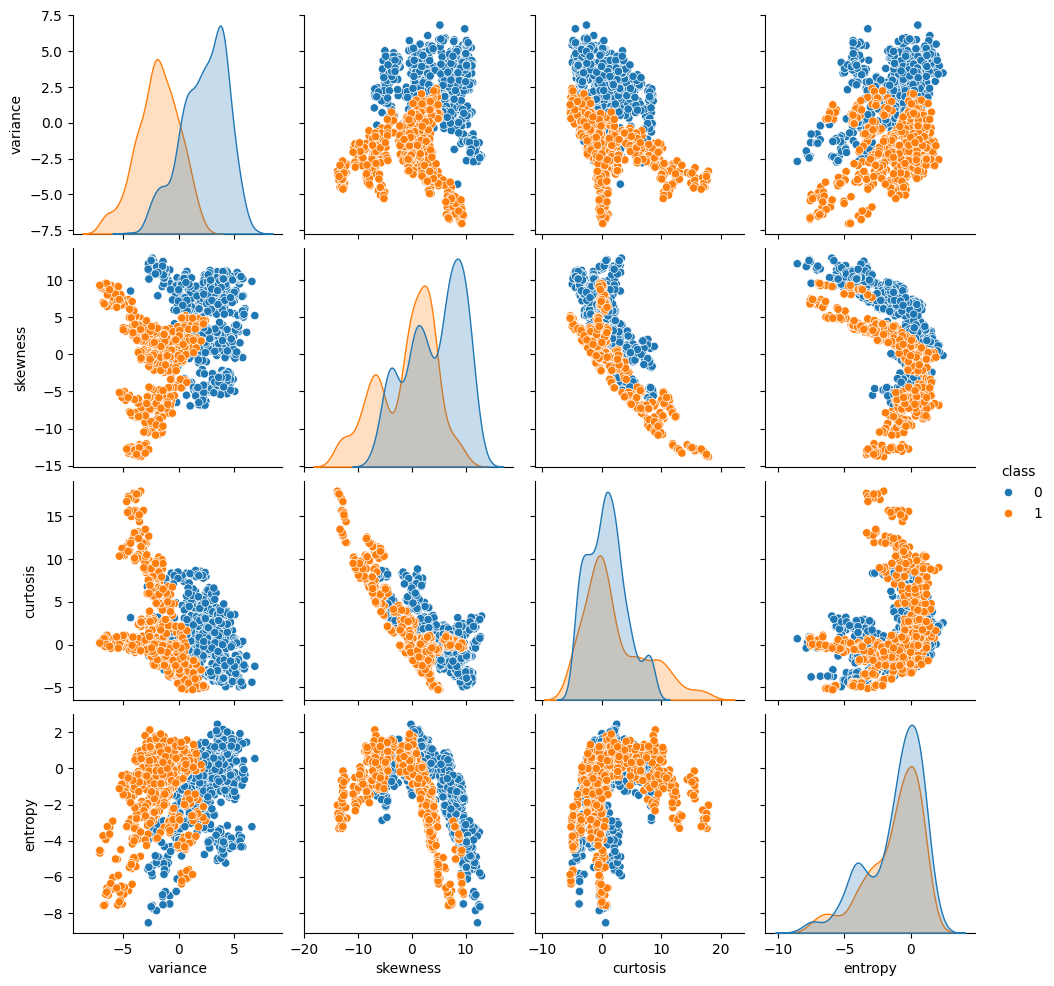

Descriptive Statistics: 
           variance     skewness     curtosis      entropy        class
count  1372.000000  1372.000000  1372.000000  1372.000000  1372.000000
mean      0.433735     1.922353     1.397627    -1.191657     0.444606
std       2.842763     5.869047     4.310030     2.101013     0.497103
min      -7.042100   -13.773100    -5.286100    -8.548200     0.000000
25%      -1.773000    -1.708200    -1.574975    -2.413450     0.000000
50%       0.496180     2.319650     0.616630    -0.586650     0.000000
75%       2.821475     6.814625     3.179250     0.394810     1.000000
max       6.824800    12.951600    17.927400     2.449500     1.000000
Observations per class: 
 class
0    762
1    610
Name: count, dtype: int64


In [4]:
# @title Văn bản tiêu đề mặc định
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Đọc dữ liệu từ tệp CSV (thay đổi đường dẫn nếu cần)
# Ví dụ tệp CSV có tên 'banknotes.csv' và chứa các cột: 'variance', 'skewness', 'kurtosis', 'entropy', và 'class'
banknotes = pd.read_csv('BankNote_Authentication.csv')  # Thay đổi đường dẫn nếu tệp CSV ở vị trí khác

# Kiểm tra xem dữ liệu đã được tải đúng chưa
print(banknotes.head())

# Dùng seaborn's pairplot để vẽ đồ thị các mối quan hệ giữa các đặc trưng
sns.pairplot(banknotes, hue='class')  # 'class' là cột nhãn phân loại
plt.show()

# Thống kê mô tả dữ liệu
print('Descriptive Statistics: \n', banknotes.describe())

# Đếm số lượng quan sát trong mỗi lớp (real/fake)
print('Observations per class: \n', banknotes['class'].value_counts())


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 5s 5s/step - accuracy: 0.1000 - loss: 2.3030 - val_accuracy: 0.1147 - val_loss: 2.3285
Epoch 2/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step - accuracy: 0.5000 - loss: 2.0356 - val_accuracy: 0.1403 - val_loss: 2.3062
Epoch 3/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step - accuracy: 0.8000 - loss: 1.8196 - val_accuracy: 0.1565 - val_loss: 2.2907
Epoch 4/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - accuracy: 0.9000 - loss: 1.6299 - val_accuracy: 0.1727 - val_loss: 2.2792
Epoch 5/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - accuracy: 0.9000 - loss: 1.4559 - val_accuracy: 0.1858 - val_loss: 2.2715
Epoch 6/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - accuracy: 1.0000 - loss: 1.2953 - val_accuracy: 0.1971 - val_loss: 2.2679
Epoch 7/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - accuracy: 1.0000 - loss: 1.1421 - val_accuracy: 0.2084 - val_loss: 2.2652
Epoch 8/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - accuracy: 1.0000 - loss: 0.9954 - val_accuracy: 0.2212 - val_loss: 2.2643
Epoch 9/20
1/1 ━

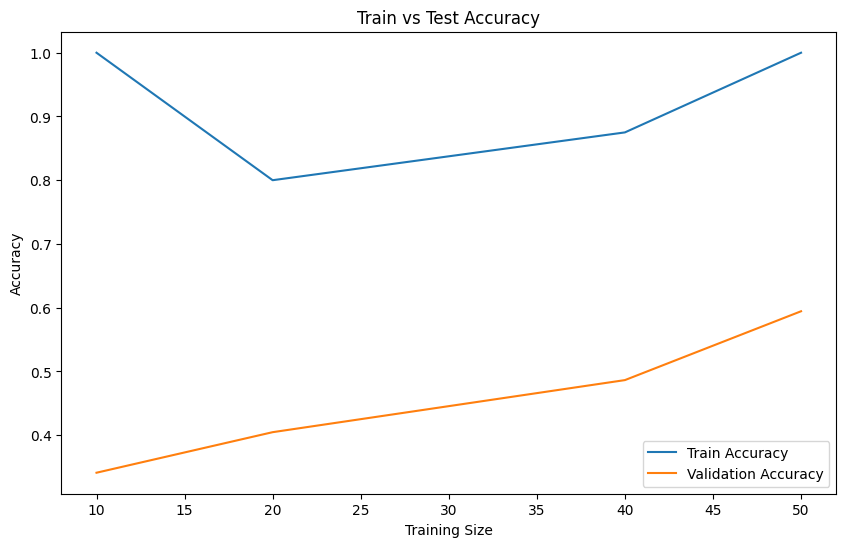

In [6]:
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.datasets import mnist
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.callbacks import ModelCheckpoint,EarlyStopping
(X_train,y_train),(X_test,y_test)=mnist.load_data()
X_train=X_train.reshape(-1,28*28).astype('float32')/255
X_test=X_test.reshape(-1,28*28).astype('float32')/255
y_train=to_categorical(y_train,10)
y_test=to_categorical(y_test,10)

model=Sequential()
model.add(Dense(128,activation='relu',input_shape=(28*28,)))
model.add(Dense(64,activation='relu')) # Corrected 'rele' to 'relu'
model.add(Dense(10,activation='softmax'))
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy']) # Corrected 'catogorical_crossentropy' to 'categorical_crossentropy'

monitor_val_acc = EarlyStopping(monitor='val_accuracy',patience=3,restore_best_weights=True)
model_checkpoint = ModelCheckpoint('best.keras',save_best_only=True)

training_size =[10,20,40,50]
train_accs =[]
test_accs =[]

for size in training_size:
  X_train_frac,y_train_frac = X_train[:size],y_train[:size]
  h_callback = model.fit(X_train_frac,y_train_frac,epochs = 20,validation_data=(X_test,y_test),
                        validation_split=0.2,callbacks =[monitor_val_acc,model_checkpoint]) # Corrected 'mode' to 'model'
  train_accs.append(h_callback.history['accuracy'][-1])
  test_accs.append(h_callback.history['val_accuracy'][-1])

def plot_accuracy(train_accuracy, val_accuracy):
    plt.figure(figsize=(10, 6))
    plt.plot(training_size, train_accuracy, label='Train Accuracy')
    plt.plot(training_size, val_accuracy, label='Validation Accuracy')
    plt.title('Train vs Test Accuracy')
    plt.xlabel('Training Size')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.show()

# The plot_loss function was not used in the original loop, removing it or updating it to work with the loop's output would be necessary.
# For now, I'll comment it out or remove it if it's not relevant to the current loop's outputs.
# def plot_loss(train_loss, val_loss):
#     plt.figure(figsize=(10, 6))
#     plt.plot(train_loss, label='Train Loss')
#     plt.plot(val_loss, label='Validation Loss')
#     plt.title('Train vs Test Loss')
#     plt.xlabel('Epochs')
#     plt.ylabel('Loss')
#     plt.legend()
#     plt.show()

# Vẽ đồ thị độ chính xác (accuracy)
plot_accuracy(train_accs, test_accs) # Using the collected accuracies from the loop

# Mục mới

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


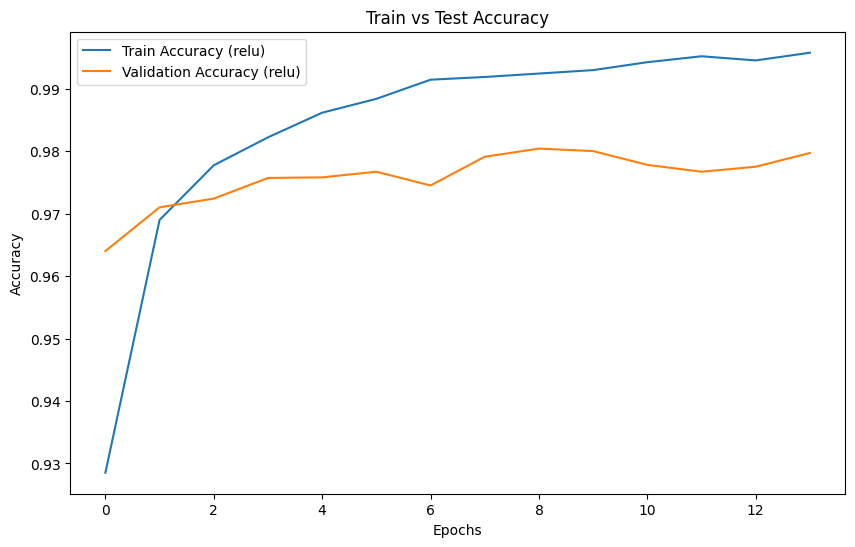

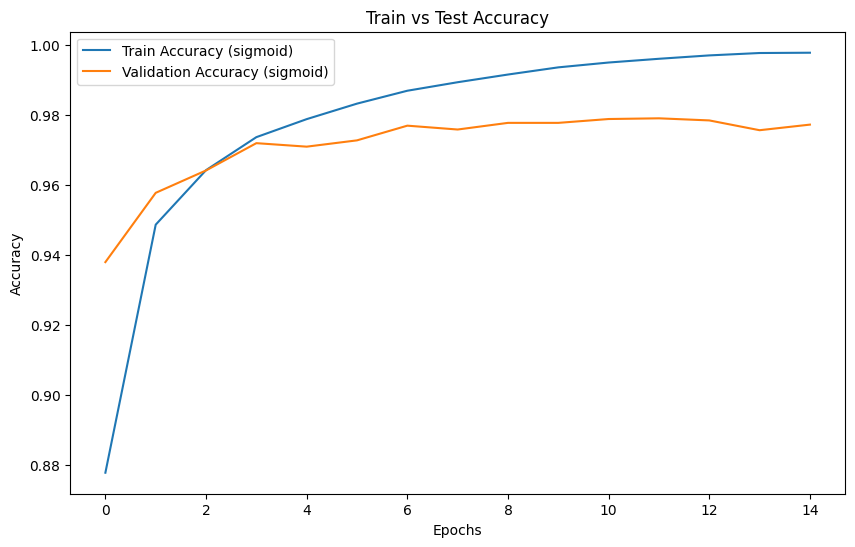

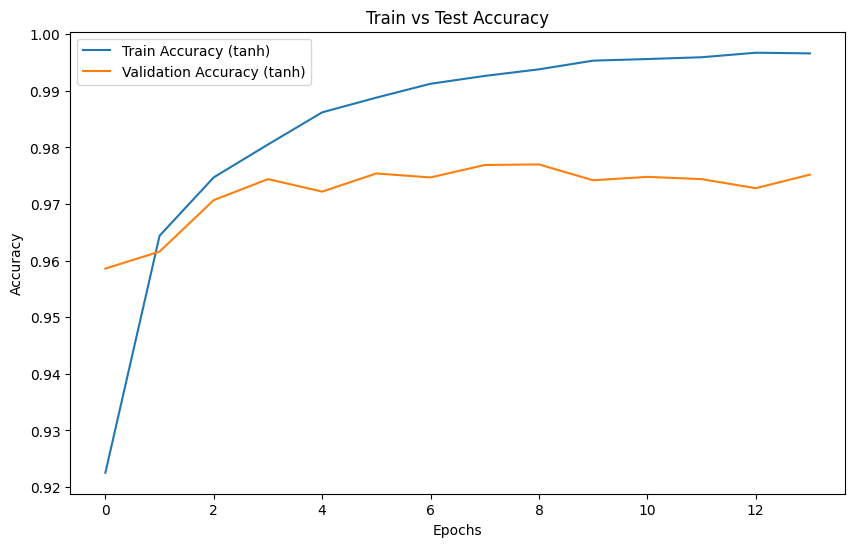

In [10]:
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.datasets import mnist
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping

# Tải dữ liệu MNIST
(X_train, y_train), (X_test, y_test) = mnist.load_data()

# Tiền xử lý dữ liệu
X_train = X_train.reshape(-1, 28*28).astype('float32') / 255
X_test = X_test.reshape(-1, 28*28).astype('float32') / 255
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

# Hàm để tạo mô hình với hàm kích hoạt cụ thể
def get_model(act_function):
    model = Sequential()
    model.add(Dense(128, activation=act_function, input_shape=(28*28,)))
    model.add(Dense(64, activation=act_function))
    model.add(Dense(10, activation='softmax'))
    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
    return model

# Danh sách các hàm kích hoạt để thử nghiệm
activations = ['relu', 'sigmoid', 'tanh']

# Tạo từ điển để lưu kết quả huấn luyện
activation_results = {}

# Callbacks
monitor_val_acc = EarlyStopping(monitor='val_accuracy', patience=5, restore_best_weights=True)
model_checkpoint = ModelCheckpoint('best_banknote_model.keras', save_best_only=True)

# Vòng lặp huấn luyện mô hình với các hàm kích hoạt khác nhau
for funct in activations:
    # Lấy mô hình với hàm kích hoạt cụ thể
    model = get_model(act_function=funct)

    # Huấn luyện mô hình
    h_callback = model.fit(X_train, y_train,
                    epochs=15,  # Số epoch có thể thay đổi tùy ý
                    validation_data=(X_test, y_test),
                    validation_split=0.2,verbose=0,
                    callbacks=[monitor_val_acc, model_checkpoint])  # Đưa callback vào huấn luyện

    # Lưu kết quả huấn luyện
    activation_results[funct] = h_callback

# Vẽ đồ thị độ chính xác (accuracy)
def plot_accuracy(train_accuracy, val_accuracy, label):
    plt.figure(figsize=(10, 6))
    plt.plot(train_accuracy, label=f'Train Accuracy ({label})')
    plt.plot(val_accuracy, label=f'Validation Accuracy ({label})')
    plt.title('Train vs Test Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.show()

# Vẽ đồ thị so sánh độ chính xác trên các hàm kích hoạt
for funct in activations:
    history = activation_results[funct]
    plot_accuracy(history.history['accuracy'], history.history['val_accuracy'], funct)
